# **Coding Challenge**

- Hypothesis: Poorer countries have more children out of school

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno



In [2]:
df = pd.read_csv('./WB_more_data.csv')
df.head(5)

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31200985,31624696,32055883,36543541,37260563,38000626,44177969,44903225,45606480
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,58324,58177,57941,54310,53691,52995,45035,44273,43914
4,"Population, total",SP.POP.TOTL,Andorra,AND,67820,70849,73907,70567,71013,71367,79034,79824,80088


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Name   1085 non-null   object
 1   Series Code   1085 non-null   object
 2   Country Name  1085 non-null   object
 3   Country Code  1085 non-null   object
 4   2001          1085 non-null   object
 5   2002          1085 non-null   object
 6   2003          1085 non-null   object
 7   2011          1085 non-null   object
 8   2012          1085 non-null   object
 9   2013          1085 non-null   object
 10  2021          1085 non-null   object
 11  2022          1085 non-null   object
 12  2023          1085 non-null   object
dtypes: object(13)
memory usage: 110.3+ KB


In [4]:
#rename columns and change type
df.columns = [i.lower().replace(' ', '_') for i in df.columns]
df.columns = ['y_'+i if '2' in i else i for i in df.columns]

In [5]:
for i in [i for i in df.columns if 'y_2' in i]:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   series_name   1085 non-null   object 
 1   series_code   1085 non-null   object 
 2   country_name  1085 non-null   object 
 3   country_code  1085 non-null   object 
 4   y_2001        833 non-null    float64
 5   y_2002        845 non-null    float64
 6   y_2003        843 non-null    float64
 7   y_2011        885 non-null    float64
 8   y_2012        895 non-null    float64
 9   y_2013        879 non-null    float64
 10  y_2021        883 non-null    float64
 11  y_2022        798 non-null    float64
 12  y_2023        608 non-null    float64
dtypes: float64(9), object(4)
memory usage: 110.3+ KB


In [7]:
df.series_name.value_counts()

series_name
Population, total                                   217
Children out of school (% of primary school age)    217
Children out of school, primary                     217
GNI per capita, Atlas method (current US$)          217
GNI, Atlas method (current US$)                     217
Name: count, dtype: int64

## **Methodology**

- For the approach, we are going to use GNI per capita, Atlas method (current US$) as an indicator of poor/rich countries and Children out of school (% of primary school age).
- We took both indicators normalized by the population of each country to avoid missleading conclusions that can be caused by different populaiton sizes among countries

In [11]:
df = df.loc[df['series_name'].isin(['Children out of school (% of primary school age)', 'GNI per capita, Atlas method (current US$)'])]
df.sample(5)

,series_name,series_code,country_name,country_code,y_2001,y_2002,y_2003,y_2011,y_2012,y_2013,y_2021,y_2022,y_2023
761,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Lebanon,LBN,4060.0,3950.0,3690.0,7800.00000,8080.00000,7970.00000,4970.00000,4410.00000,3740.0
315,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Japan,JPN,NaN,NaN,NaN,NaN,NaN,0.03142,0.03021,NaN,NaN
222,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Angola,AGO,NaN,NaN,NaN,13.81661,NaN,NaN,NaN,NaN,NaN
257,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Chile,CHL,NaN,NaN,NaN,3.58456,3.39425,3.35414,2.16670,1.29288,NaN
668,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Belarus,BLR,1300.0,1380.0,1630.0,6340.00000,6630.00000,7030.00000,7040.00000,7230.00000,7780.0


<Axes: >

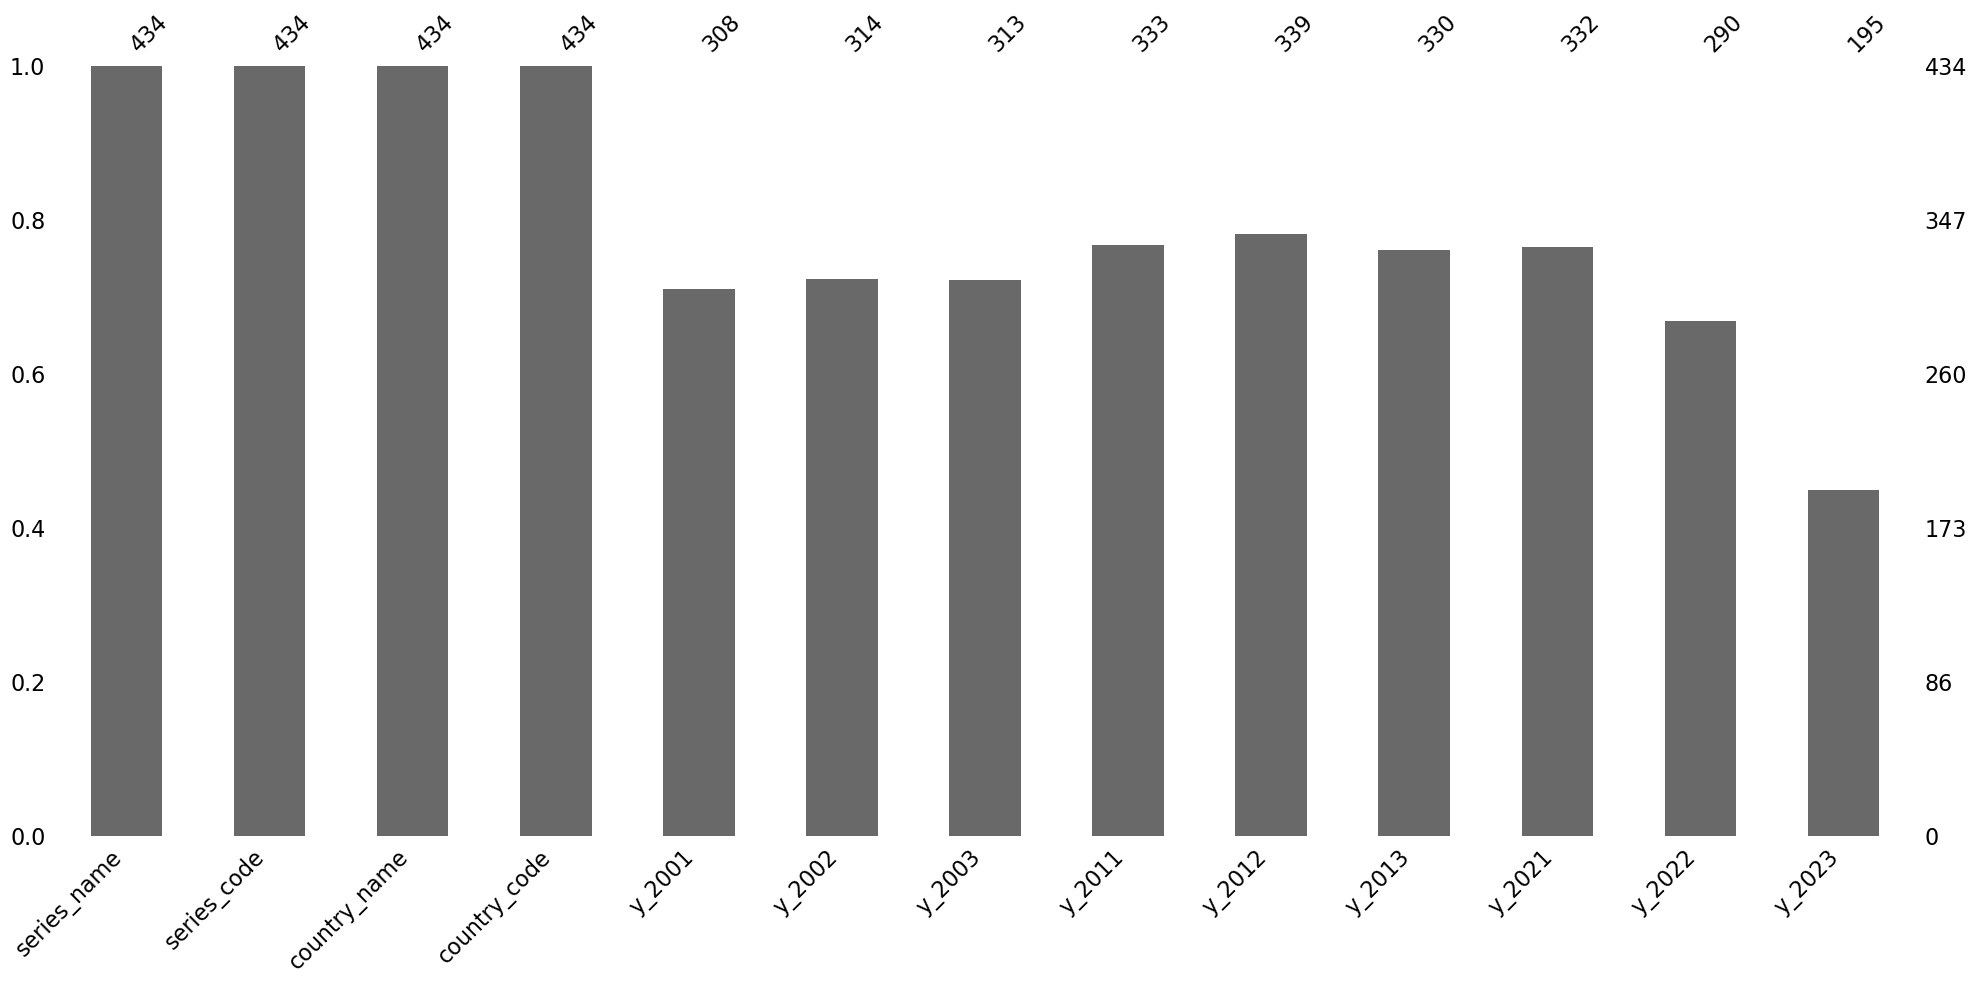

In [9]:
msno.bar(df)

Having seen that there is a lot of discontiunuity in years, we decided to work only with the recent year with less missing values, <code>y_2021</code>

In [30]:
df = df.drop(columns=[i for i in df.columns if 'y_2' in i and i!='y_2021'])
df

,series_name,series_code,country_name,country_code,y_2021
217,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Afghanistan,AFG,NaN
218,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Albania,ALB,6.18712
219,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Algeria,DZA,0.19645
220,Children out of school (% of primary school age),SE.PRM.UNER.ZS,American Samoa,ASM,NaN
221,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Andorra,AND,8.04498
...,...,...,...,...,...
863,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Virgin Islands (U.S.),VIR,NaN
864,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,West Bank and Gaza,PSE,4270.00000
865,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,"Yemen, Rep.",YEM,NaN
866,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Zambia,ZMB,1050.00000


To easily manipulate and plot the series, we decided to reshape the dataframe.

In [32]:
df_melted = pd.melt(df, value_vars=[i for i in df.columns if 'y_2' in i], id_vars=['series_name','country_name'])
df_melted['series_name'] = df_melted['series_name'].replace({'Children out of school (% of primary school age)':'children_oos_2021', 'GNI per capita, Atlas method (current US$)':'gni_pc_2021'})
df_melted = df_melted.rename(columns = {'variable': 'year'})
df_melted.sample(5)

,series_name,country_name,year,value
381,gni_pc_2021,San Marino,y_2021,47120.00000
152,children_oos_2021,Papua New Guinea,y_2021,NaN
229,gni_pc_2021,Azerbaijan,y_2021,4910.00000
372,gni_pc_2021,Philippines,y_2021,3550.00000
132,children_oos_2021,Montenegro,y_2021,1.34793


In [35]:
df_pivot = df_melted.pivot(index = ['country_name'], columns = 'series_name', values = 'value').reset_index()
df_pivot.sample(5)

series_name,country_name,children_oos_2021,gni_pc_2021
3,American Samoa,NaN,NaN
65,Faroe Islands,NaN,69840.0
195,Tonga,1.6170,4970.0
40,Chile,2.1667,14760.0
84,Haiti,NaN,1440.0


In [61]:
df_pivot['gni_interval'] = pd.cut(df_pivot['gni_pc_2021'], bins = 10, labels = [i for i in range(1,11)])
df_pivot.gni_interval.value_counts()

gni_interval
1     128
2      26
3      12
4      10
5       9
6       7
7       3
8       2
10      1
9       0
Name: count, dtype: int64

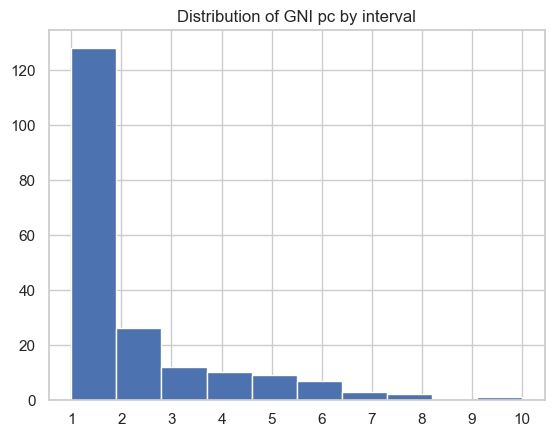

In [64]:
ax = df_pivot.gni_interval.hist(bins=10)
ax.set_title('Distribution of GNI pc by interval')
ax.set_xticks(range(1,11))
plt.show()


In [63]:
df_pivot['gni_decile'] = pd.qcut(df_pivot['gni_pc_2021'], q = 10, labels = [i for i in range(1,11)])
df_pivot.gni_decile.value_counts()

gni_decile
1     20
2     20
3     20
4     20
6     20
8     20
9     20
10    20
5     19
7     19
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation between gni_pc and children_oos for 2021')

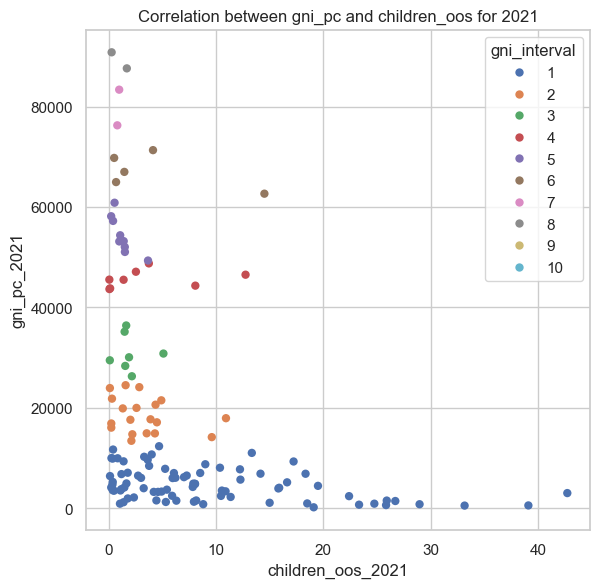

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")



# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="children_oos_2021", y="gni_pc_2021",
                hue="gni_interval",
                sizes=(1, 8), linewidth=0,
                data=df_pivot, ax=ax)
plt.title('Correlation between gni_pc and children_oos for 2021')

Text(0.5, 1.0, 'Correlation between gni_pc_ln and children_oos for 2021')

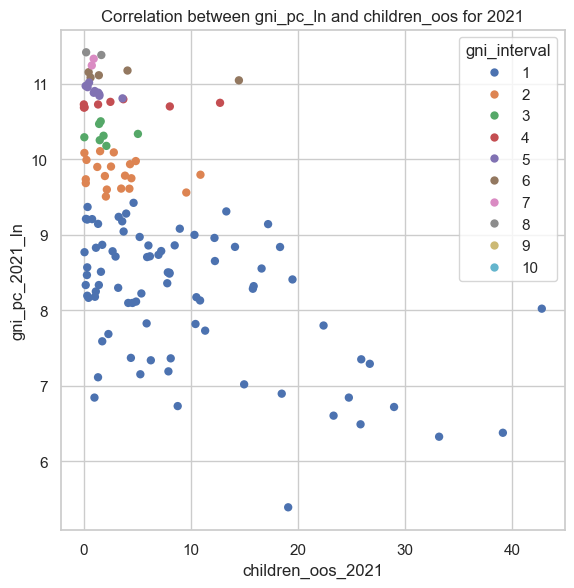

In [66]:
import numpy as np
df_pivot['gni_pc_2021_ln'] = np.log(df_pivot['gni_pc_2021'])
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="children_oos_2021", y="gni_pc_2021_ln",
                hue="gni_interval",
                sizes=(1, 8), linewidth=0,
                data=df_pivot, ax=ax)
plt.title('Correlation between gni_pc_ln and children_oos for 2021')

Text(0.5, 1.0, 'Correlation between gni_pc_ln and children_oos for 2021')

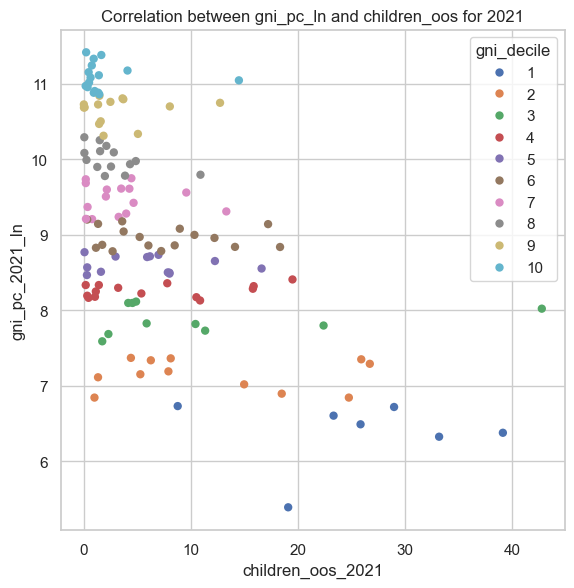

In [67]:
import numpy as np
df_pivot['gni_pc_2021_ln'] = np.log(df_pivot['gni_pc_2021'])
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="children_oos_2021", y="gni_pc_2021_ln",
                hue="gni_decile",
                sizes=(1, 8), linewidth=0,
                data=df_pivot, ax=ax)
plt.title('Correlation between gni_pc_ln and children_oos for 2021')

## **Fill Na**